# Exploring Walmart Sales from February 5, 2010 to November 1, 2012.

In this project we are using a historical two year sales data of Walmart(from Kaggle) that contains over 6,000 rows and the following 8 columns:
- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

This dataset offers an opportunity to analyze sales trends, external economic influences, and the impact of holidays on consumer spending. We will first clean the data and create new columns. We will then analyze key factors such as temperature, fuel prices, the Consumer Price Index (CPI), and unemployment rates to gain insights into how economic and environmental variables influence retail sales and understand the impact of holidays on weekly sales.

In [14]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [16]:
# Load Study data file
walmart_path = "data/Walmart_Sales.csv"

# Read the Walmart data
walmart_data = pd.read_csv(walmart_path)

# Display the data table for preview
walmart_data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [18]:
# Standardize column names
walmart_data.rename(columns={"Store":"Store ID", "Temperature":"Avg Temperature (℉)", "CPI": "Consumer Price Index", 
                             "Unemployment": "Unemployment Rate"}, inplace=True)

#Preview data with new column names
walmart_data
                   

,Store ID,Date,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Consumer Price Index,Unemployment Rate
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [20]:
#Preview data statistics for all columns
walmart_data.describe()

,Store ID,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Consumer Price Index,Unemployment Rate
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [22]:
# Use bins based on actual sales values to create a new column to understand sales volume 
bins =[0, 1000000.00, 1500000.00, walmart_data['Weekly_Sales'].max()]
labels = ['Low', 'Medium', 'High']

# Categorizing sales into different levels
walmart_data['Sales_Category'] = pd.cut(walmart_data['Weekly_Sales'],bins, labels=labels)

#Preview data
walmart_data

,Store ID,Date,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Consumer Price Index,Unemployment Rate,Sales_Category
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,High
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,High
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,High
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Medium
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,High
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,Low
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,Low
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,Low
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,Low


In [24]:
# Check for data description
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Store ID              6435 non-null   int64   
 1   Date                  6435 non-null   object  
 2   Weekly_Sales          6435 non-null   float64 
 3   Holiday_Flag          6435 non-null   int64   
 4   Avg Temperature (℉)   6435 non-null   float64 
 5   Fuel_Price            6435 non-null   float64 
 6   Consumer Price Index  6435 non-null   float64 
 7   Unemployment Rate     6435 non-null   float64 
 8   Sales_Category        6435 non-null   category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 408.7+ KB


In [26]:
# Check for missing values 
walmart_data.isnull().sum()

Store ID                0
Date                    0
Weekly_Sales            0
Holiday_Flag            0
Avg Temperature (℉)     0
Fuel_Price              0
Consumer Price Index    0
Unemployment Rate       0
Sales_Category          0
dtype: int64

In [28]:
# Check for unique values
walmart_data.nunique()

Store ID                  45
Date                     143
Weekly_Sales            6435
Holiday_Flag               2
Avg Temperature (℉)     3528
Fuel_Price               892
Consumer Price Index    2145
Unemployment Rate        349
Sales_Category             3
dtype: int64

In [30]:
# Check for duplicates values
walmart_data.duplicated().sum()

0

In [32]:
# Change the column holiday flag into integer
walmart_data['Holiday_Flag'] = walmart_data['Holiday_Flag'].astype(int)
walmart_data['Holiday_Flag']=walmart_data['Holiday_Flag'].map({0:'None Holiday', 1: 'Holiday'})

#Preview data
walmart_data

,Store ID,Date,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Consumer Price Index,Unemployment Rate,Sales_Category
0,1,05-02-2010,1643690.90,None Holiday,42.31,2.572,211.096358,8.106,High
1,1,12-02-2010,1641957.44,Holiday,38.51,2.548,211.242170,8.106,High
2,1,19-02-2010,1611968.17,None Holiday,39.93,2.514,211.289143,8.106,High
3,1,26-02-2010,1409727.59,None Holiday,46.63,2.561,211.319643,8.106,Medium
4,1,05-03-2010,1554806.68,None Holiday,46.50,2.625,211.350143,8.106,High
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,None Holiday,64.88,3.997,192.013558,8.684,Low
6431,45,05-10-2012,733455.07,None Holiday,64.89,3.985,192.170412,8.667,Low
6432,45,12-10-2012,734464.36,None Holiday,54.47,4.000,192.327265,8.667,Low
6433,45,19-10-2012,718125.53,None Holiday,56.47,3.969,192.330854,8.667,Low


In [34]:
#Create new dataframe for sales summary for each store to identify sum, mean, maximum, and minimum sales
sale_summary =walmart_data.groupby("Store ID").agg({'Weekly_Sales':['sum','mean','max', 'min']}).reset_index()

#Print summary
sale_summary

Store ID  Weekly_Sales                                      
                      sum          mean         max         min
0         1  2.224028e+08  1.555264e+06  2387950.20  1316899.31
1         2  2.753824e+08  1.925751e+06  3436007.68  1650394.44
2         3  5.758674e+07  4.027044e+05   605990.41   339597.38
3         4  2.995440e+08  2.094713e+06  3676388.98  1762539.30
4         5  4.547569e+07  3.180118e+05   507900.07   260636.71
5         6  2.237561e+08  1.564728e+06  2727575.18  1261253.18
6         7  8.159828e+07  5.706173e+05  1059715.27   372673.61
7         8  1.299512e+08  9.087495e+05  1511641.09   772539.12
8         9  7.778922e+07  5.439806e+05   905324.68   452905.22
9        10  2.716177e+08  1.899425e+06  3749057.69  1627707.31
10       11  1.939628e+08  1.356383e+06  2306265.36  1100418.69
11       12  1.442872e+08  1.009002e+06  1768249.89   802105.50
12       13  2.865177e+08  2.003620e+06  3595903.20  1633663.12
13       14  2.889999e+08  2.020978e+06  3818686.45  1479514.66
14       15  8.913368e+07  6.233125e+05  1368318.17   454183.42
15       16  7.425243e+07  5.192477e+05  1004730.69   368600.00
16       17  1.277821e+08  8.935814e+05  1309226.79   635862.55
17       18  1.551147e+08  1.084718e+06  2027507.15   540922.94
18       19  2.066349e+08  1.444999e+06  2678206.42  1181204.53
19       20  3.013978e+08  2.107677e+06  3766687.43  1761016.51
20       21  1.081179e+08  7.560691e+05  1587257.78   596218.24
21       22  1.470756e+08  1.028501e+06  1962445.04   774262.28
22       23  1.987506e+08  1.389864e+06  2734277.10  1016756.10
23       24  1.940160e+08  1.356755e+06  2386015.75  1057290.41
24       25  1.010612e+08  7.067215e+05  1295391.19   558794.63
25       26  1.434164e+08  1.002912e+06  1573982.47   809833.21
26       27  2.538559e+08  1.775216e+06  3078162.08  1263534.86
27       28  1.892637e+08  1.323522e+06  2026026.39  1079669.11
28       29  7.714155e+07  5.394514e+05  1130926.79   395987.24
29       30  6.271689e+07  4.385796e+05   519354.88   369722.32
30       31  1.996139e+08  1.395901e+06  2068942.97  1198071.60
31       32  1.668192e+08  1.166568e+06  1959526.96   955463.84
32       33  3.716022e+07  2.598617e+05   331173.51   209986.25
33       34  1.382498e+08  9.667816e+05  1620748.25   836717.75
34       35  1.315207e+08  9.197250e+05  1781866.98   576332.05
35       36  5.341221e+07  3.735120e+05   489372.02   270677.98
36       37  7.420274e+07  5.189003e+05   605791.46   451327.61
37       38  5.515963e+07  3.857317e+05   499267.66   303908.81
38       39  2.074455e+08  1.450668e+06  2554482.84  1158698.44
39       40  1.378703e+08  9.641280e+05  1648829.18   764014.75
40       41  1.813419e+08  1.268125e+06  2263722.68   991941.73
41       42  7.956575e+07  5.564039e+05   674919.45   428953.60
42       43  9.056544e+07  6.333247e+05   725043.04   505405.85
43       44  4.329309e+07  3.027489e+05   376233.89   241937.11
44       45  1.123953e+08  7.859814e+05  1682862.03   617207.58

In [36]:
#Rename Sales Summary columns 
sale_summary.columns=['Store ID','Total Sales','Average Weekly Sales','Highest Weekly Sales', 'Lowest Weekly Sales']

#Print Summary
sale_summary

,Store ID,Total Sales,Average Weekly Sales,Highest Weekly Sales,Lowest Weekly Sales
0,1,2.224028e+08,1.555264e+06,2387950.20,1316899.31
1,2,2.753824e+08,1.925751e+06,3436007.68,1650394.44
2,3,5.758674e+07,4.027044e+05,605990.41,339597.38
3,4,2.995440e+08,2.094713e+06,3676388.98,1762539.30
4,5,4.547569e+07,3.180118e+05,507900.07,260636.71
5,6,2.237561e+08,1.564728e+06,2727575.18,1261253.18
6,7,8.159828e+07,5.706173e+05,1059715.27,372673.61
7,8,1.299512e+08,9.087495e+05,1511641.09,772539.12
8,9,7.778922e+07,5.439806e+05,905324.68,452905.22
9,10,2.716177e+08,1.899425e+06,3749057.69,1627707.31


# Data Visualizations

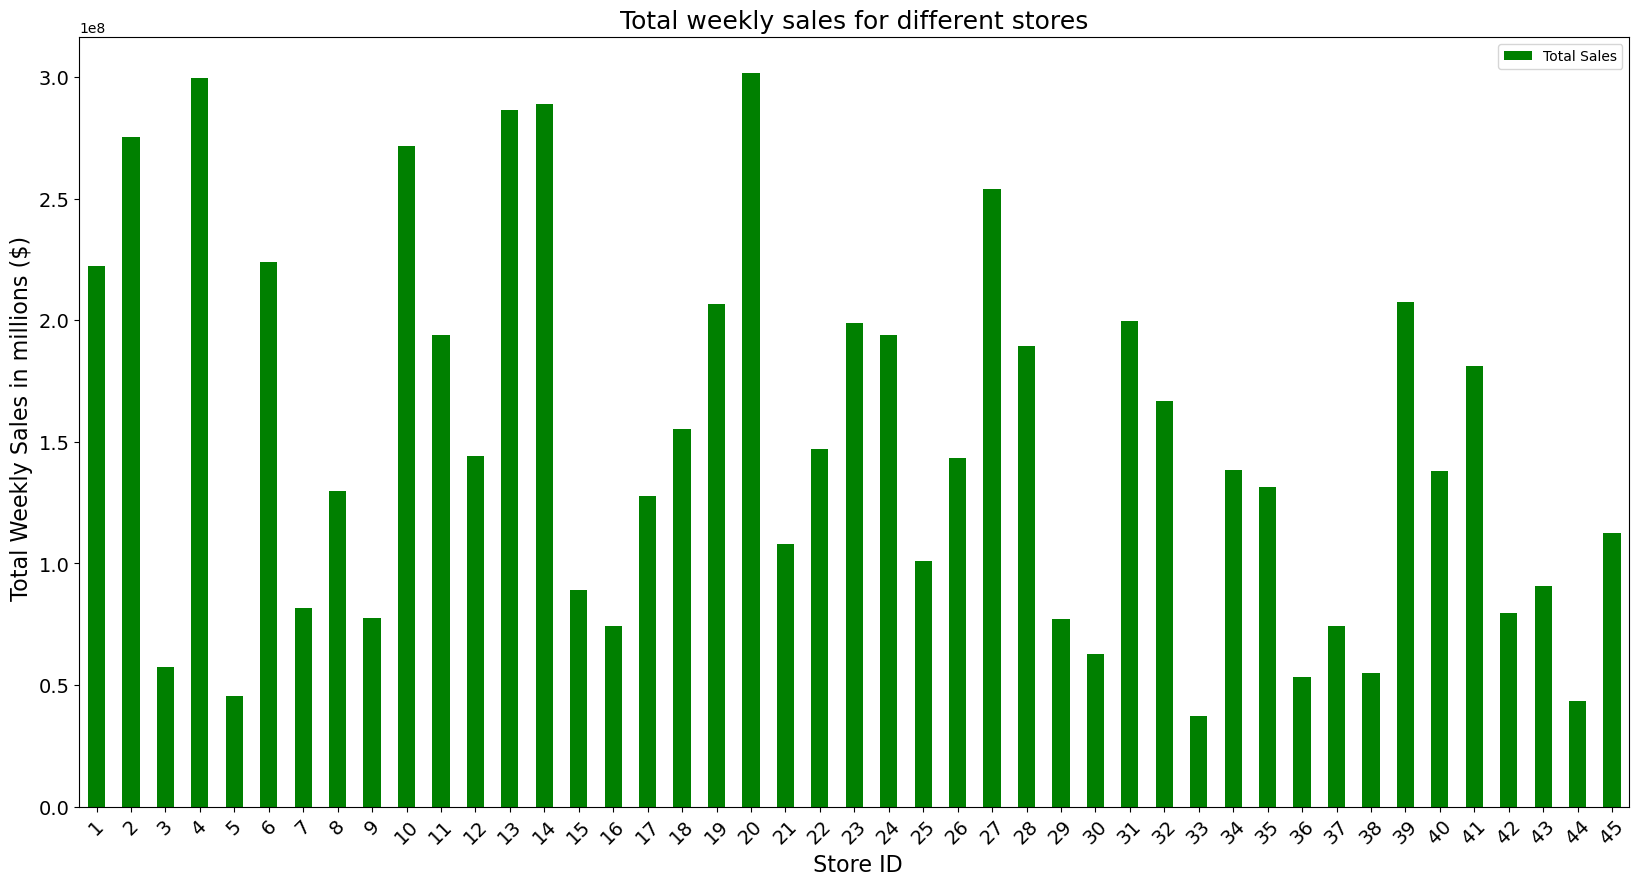

In [45]:
# Bar graph for total sales per store
sale_summary.plot (x='Store ID', y='Total Sales', kind ='bar', figsize = (20, 10), color = "green", fontsize= 14)
plt.xticks(rotation= 45)
plt.title("Total weekly sales for different stores", fontsize= 18)
plt.xlabel(" Store ID", fontsize= 16)
plt.ylabel (" Total Weekly Sales in millions ($)", fontsize= 16)

# Save the figure
plt.savefig("output/Fig1.png")

#print figure 
plt.show()

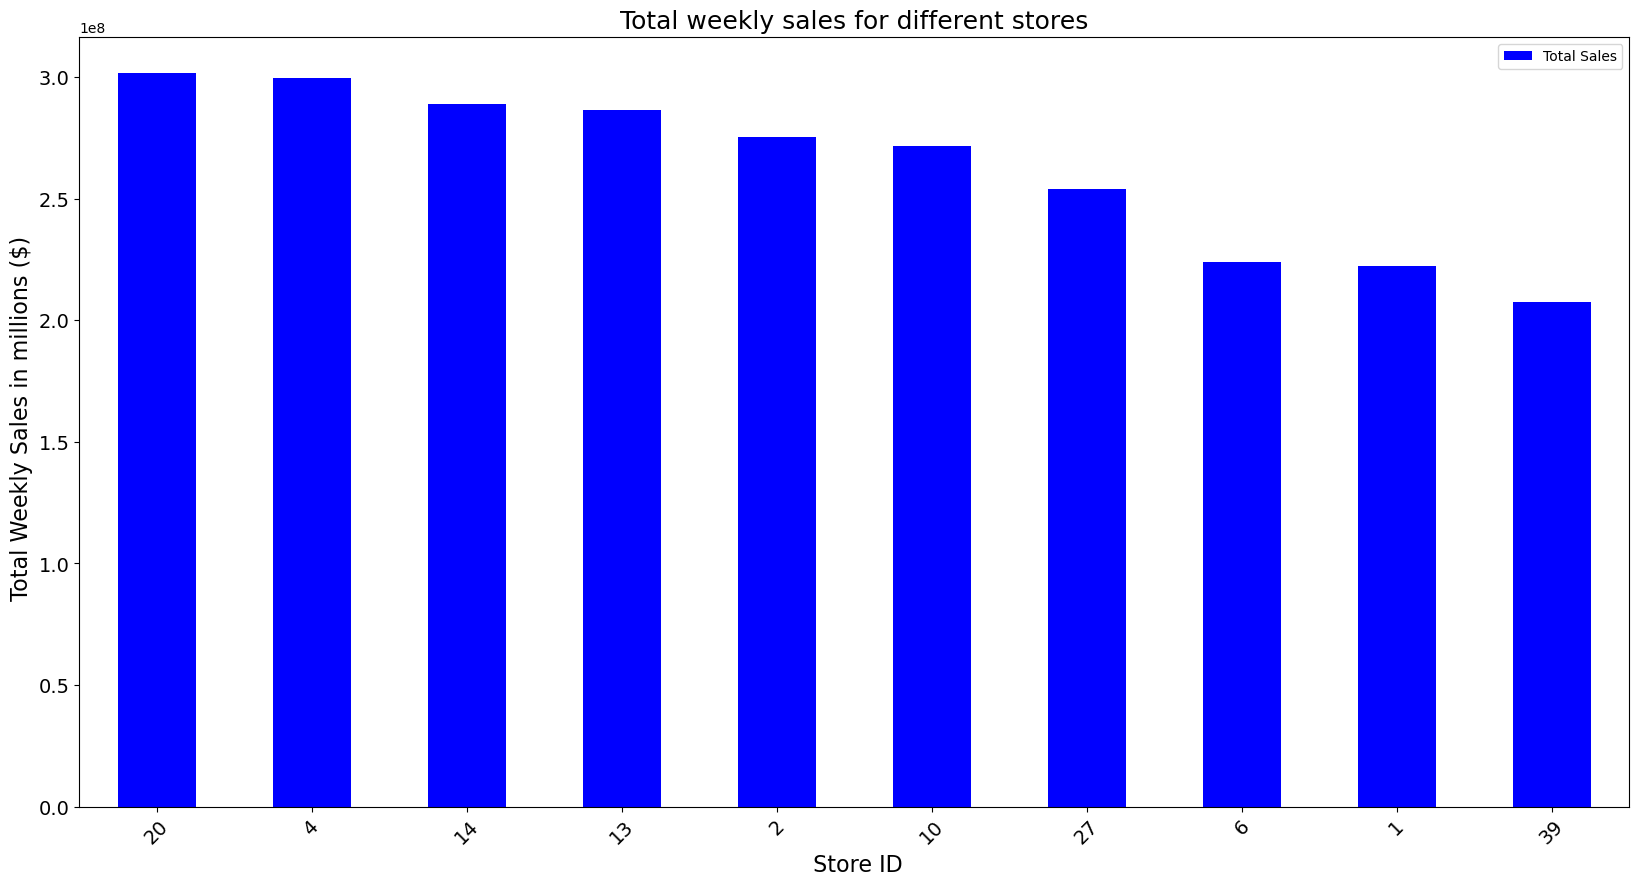

In [51]:
#Top ten stores based on total sales
top_stores = sale_summary.sort_values(by='Total Sales', ascending=False).head(10)

#Make a bar graph for the top stores
top_stores.plot (x='Store ID', y='Total Sales', kind ='bar', figsize = (20, 10), color = "blue", fontsize= 14)
plt.xticks(rotation= 45)
plt.title("Total weekly sales for different stores", fontsize= 18)
plt.xlabel(" Store ID", fontsize= 16)
plt.ylabel (" Total Weekly Sales in millions ($)", fontsize= 16)

# Save the figure
plt.savefig("output/Fig2.png")

#print figure
plt.show()

The top 10 stores had more than 2 million in weekly sales while the bottom stores had less than 0.5 million total weekly sales.

In [54]:
#Create new column to isolate the month to graph monthly sales
month_df= walmart_data["Date"].str.split('-').str[1]
walmart_data["Month"] = month_df

#priew data to see the column
walmart_data

,Store ID,Date,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Consumer Price Index,Unemployment Rate,Sales_Category,Month
0,1,05-02-2010,1643690.90,None Holiday,42.31,2.572,211.096358,8.106,High,02
1,1,12-02-2010,1641957.44,Holiday,38.51,2.548,211.242170,8.106,High,02
2,1,19-02-2010,1611968.17,None Holiday,39.93,2.514,211.289143,8.106,High,02
3,1,26-02-2010,1409727.59,None Holiday,46.63,2.561,211.319643,8.106,Medium,02
4,1,05-03-2010,1554806.68,None Holiday,46.50,2.625,211.350143,8.106,High,03
...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,None Holiday,64.88,3.997,192.013558,8.684,Low,09
6431,45,05-10-2012,733455.07,None Holiday,64.89,3.985,192.170412,8.667,Low,10
6432,45,12-10-2012,734464.36,None Holiday,54.47,4.000,192.327265,8.667,Low,10
6433,45,19-10-2012,718125.53,None Holiday,56.47,3.969,192.330854,8.667,Low,10


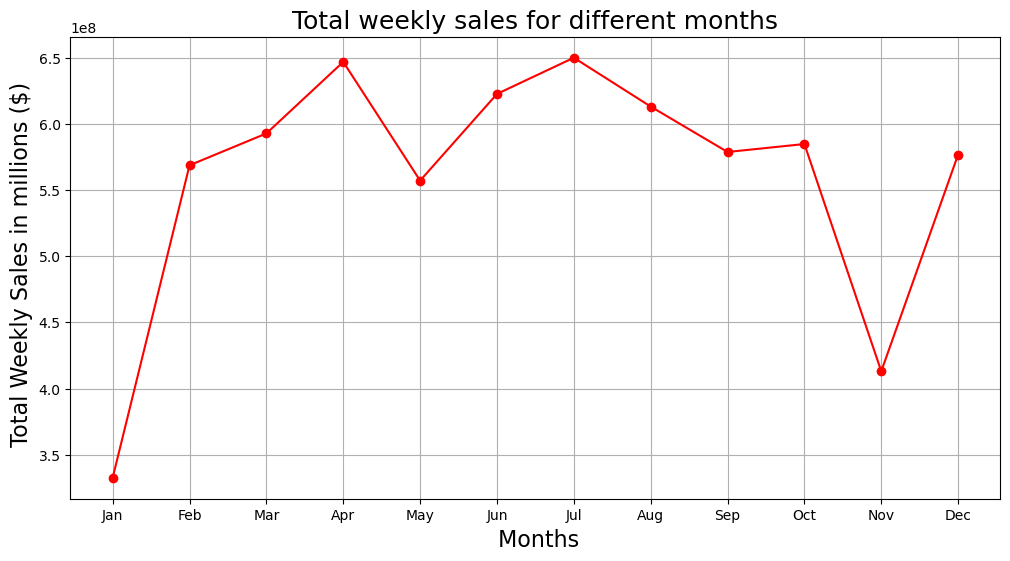

In [61]:
#Line graph of Total sales in different months
monthly_sales = walmart_data.groupby('Month')['Weekly_Sales'].sum()

monthly_sales.plot (kind= 'line', color= 'red', figsize = (12, 6), marker= 'o')
plt.xticks(range(0,12),["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct","Nov","Dec"])
plt.title("Total weekly sales for different months", fontsize= 18)
plt.grid()
plt.xlabel(" Months", fontsize= 16)
plt.ylabel (" Total Weekly Sales in millions ($)", fontsize= 16)

# Save the figure
plt.savefig("output/Fig3.png")

#print figure 
plt.show()

There appears to be a seasonal trend in weekly sales with the highest monthly sales happening in April and July (approximately 6.5 million) while the lowest sales happen in January when it is less than 3.5 million. This may be because people are saving after the Christmas and New Year holidays.

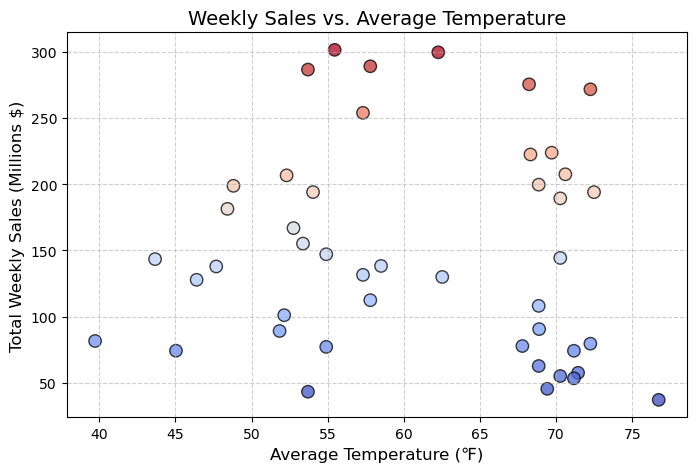

In [73]:
# Create scatter plot to see relationship between temperature and weekly sales for each store
y = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x = walmart_data.groupby("Store ID")["Avg Temperature (℉)"].mean()

# Set figure size
plt.figure(figsize=(8, 5))

#Make scatter plot
plt.scatter(x, y, c=y, cmap="coolwarm", edgecolor='black', alpha=0.75, s=80)
plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Weekly Sales vs. Average Temperature", fontsize=14)
plt.ylabel("Total Weekly Sales (Millions $)", fontsize=12)
plt.xlabel("Average Temperature (℉)", fontsize=12)

# Save the figure
plt.savefig("output/Fig4.png")

#Print figure
plt.show()

There is a weak correlation between weekly sales and average temperature, and R ^ 2 is 0.005.

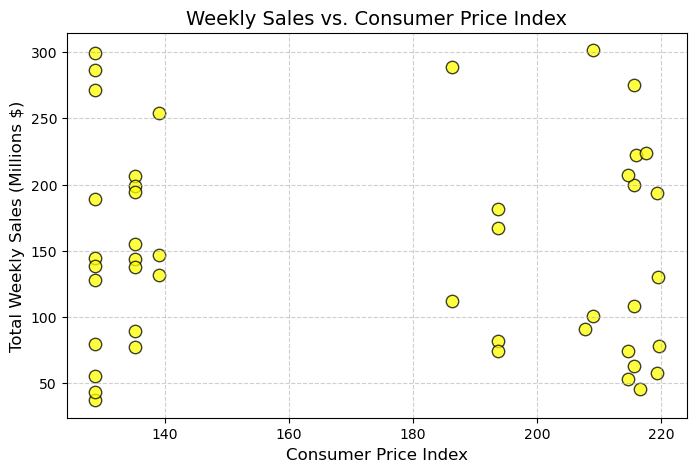

In [81]:
#Create scatter plot to see relationship between Consumer price index and weekly sales for each store

y = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x = walmart_data.groupby("Store ID")["Consumer Price Index"].mean()

# Set figure size
plt.figure(figsize=(8, 5))

#Make scatter plot
plt.scatter(x, y, color= 'yellow', edgecolor='black', alpha=0.75, s=80)
plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Weekly Sales vs. Consumer Price Index", fontsize=14)
plt.ylabel("Total Weekly Sales (Millions $)", fontsize=12)
plt.xlabel("Consumer Price Index", fontsize=12)

# Save the figure
plt.savefig("output/Fig5.png")

#Print figure
plt.show()

There is a weak correlation between weekly sales and the consumer price index, and R ^ 2 is 0.005.

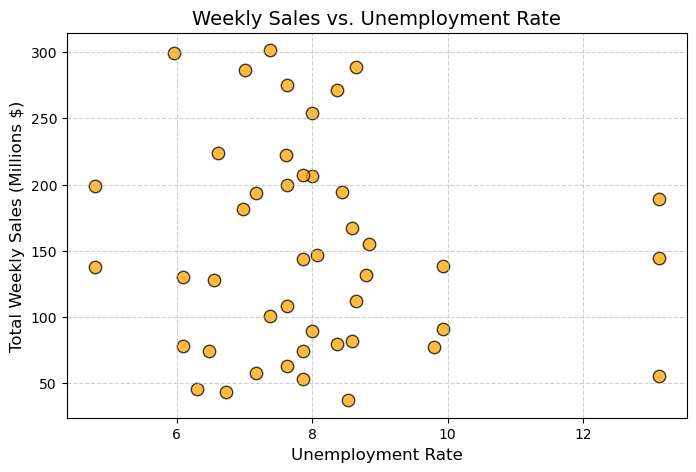

In [85]:
#Create scatter plot to see relationship between Unemployment Rate and weekly sales for each store
y = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x = walmart_data.groupby("Store ID")["Unemployment Rate"].mean()

# Set figure size
plt.figure(figsize=(8, 5))

#Make scatter plot
plt.scatter(x, y, color="orange", edgecolor='black', alpha=0.75, s=80)
plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Weekly Sales vs. Unemployment Rate", fontsize=14)
plt.ylabel("Total Weekly Sales (Millions $)", fontsize=12)
plt.xlabel("Unemployment Rate", fontsize=12)

# Save the figure
plt.savefig("output/Fig6.png")

#Print figure
plt.show()

There is a weak correlation between weekly sales and the unemployment rate, and R ^ 2 is 0.004.

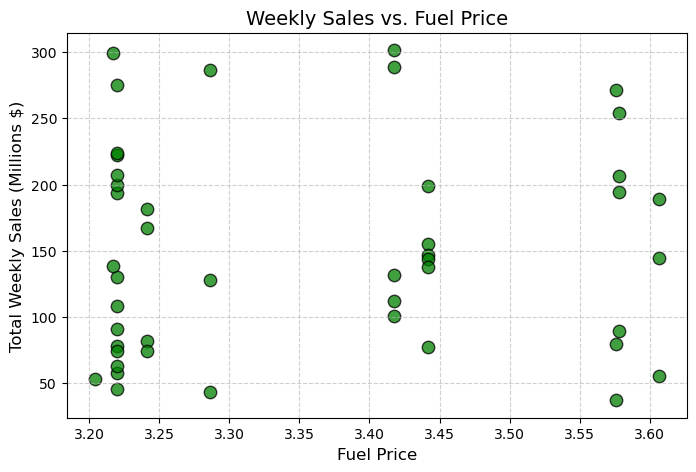

In [92]:
#Create scatter plot to see relationship between Fuel price and weekly sales for each store

y = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x = walmart_data.groupby("Store ID")["Fuel_Price"].mean()

# Set figure size
plt.figure(figsize=(8, 5))

#Make scatter plot
plt.scatter(x, y, color= 'green', edgecolor='black', alpha=0.75, s=80)
plt.grid(True, linestyle="--", alpha=0.6)
plt.title("Weekly Sales vs. Fuel Price", fontsize=14)
plt.ylabel("Total Weekly Sales (Millions $)", fontsize=12)
plt.xlabel("Fuel Price", fontsize=12)

# Save the figure
plt.savefig("output/Fig7.png")

#Print figure
plt.show()

There is a weak correlation between weekly sales and fuel price, and R ^ 2 is 0.004.

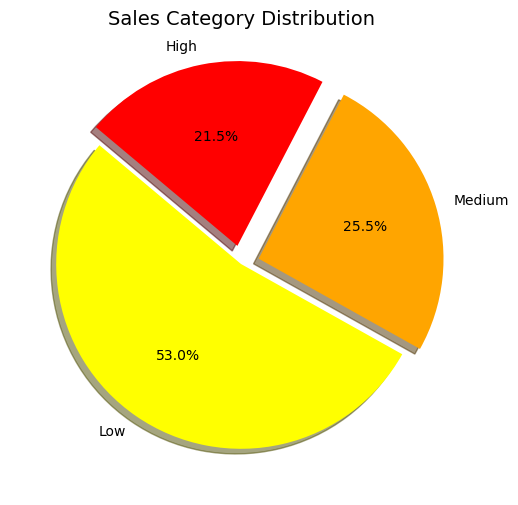

In [215]:
# Count occurrences of each sales category to create sales distribution pie chart
sales_category = walmart_data["Sales_Category"].value_counts()

# Labels should match unique categories
labels = sales_category.index

# Define colors (optional)
colors = ['yellow', 'orange', 'red']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sales_category, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, explode=[0, 0.1, 0.1], shadow= True)
plt.title("Sales Category Distribution", fontsize=14)

# Save the figure
plt.savefig("output/Fig8.png")

#Print figure
plt.show()

More than 50% of sales are less than 1 million. The reason could be people use walmart for daily needs.

### Data Analysis using linear regression

In [217]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y):
    slope, intercept, r_value, p_value, std_err = linreg.linregress(x, y)

#Equation for linear regression line    
    regression_line = slope * x + intercept

The r-squared is: 0.0058350882104965555


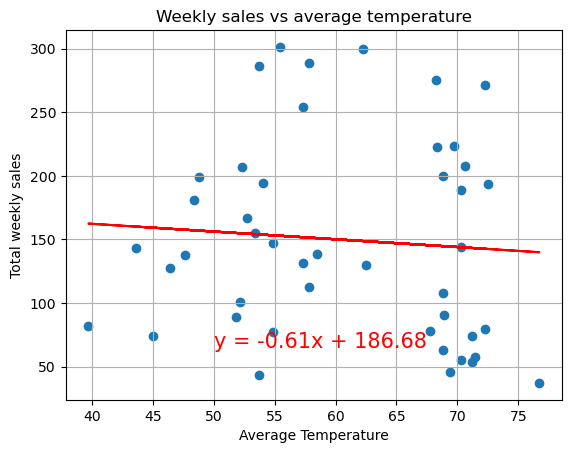

In [219]:
# Linear regression Average temperature and Total weekly sales
y_values = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x_values = walmart_data.groupby("Store ID")["Avg Temperature (℉)"].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
plt.plot(x_values, regress_values, color="red", label=f"y, linewidth=2 = {slope:.2f}x + {intercept:.2f}")
plt.annotate(line_eq,(50,65),fontsize=15,color="red")
plt.grid()
plt.ylabel('Total weekly sales')
plt.xlabel('Average Temperature')
plt.title("Weekly sales vs average temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.005862790430636291


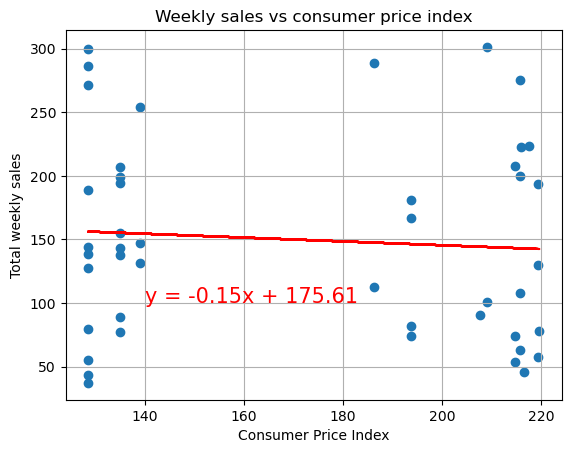

In [221]:
# Linear regression consumer price index and Total weekly sales
y_values = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x_values = walmart_data.groupby("Store ID")["Consumer Price Index"].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
plt.plot(x_values, regress_values, color="red", label=f"y, linewidth=2 = {slope:.2f}x + {intercept:.2f}")
plt.annotate(line_eq,(140,100),fontsize=15,color="red")
plt.grid()
plt.ylabel('Total weekly sales')
plt.xlabel('Consumer Price Index')
plt.title("Weekly sales vs consumer price index")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.012606977531972081


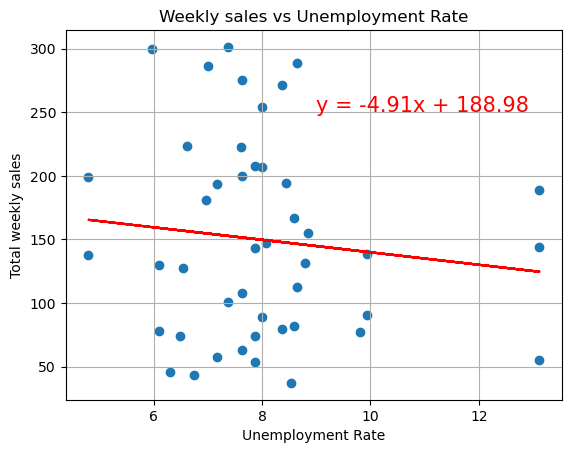

In [223]:
# Linear regression unemployment rate and Total weekly sales
y_values = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x_values = walmart_data.groupby("Store ID")["Unemployment Rate"].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
plt.plot(x_values, regress_values, color="red", label=f"y, linewidth=2 = {slope:.2f}x + {intercept:.2f}")
plt.annotate(line_eq,(9,250),fontsize=15,color="red")
plt.grid()
plt.ylabel('Total weekly sales')
plt.xlabel('Unemployment Rate')
plt.title("Weekly sales vs Unemployment Rate")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.004587925248485466


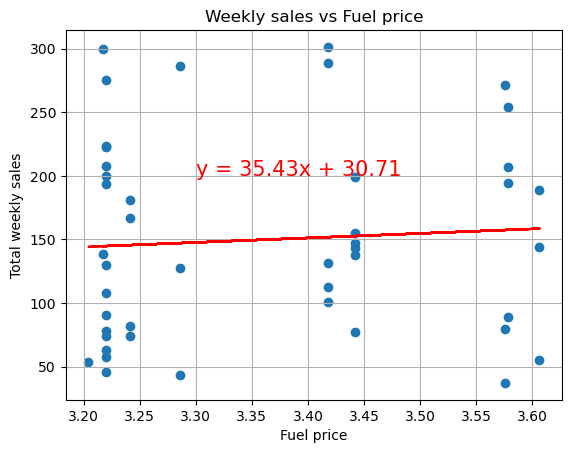

In [225]:
# Linear regression fuel price and Total weekly sales
y_values = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x_values = walmart_data.groupby("Store ID")["Fuel_Price"].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
plt.plot(x_values, regress_values, color="red", label=f"y, linewidth=2 = {slope:.2f}x + {intercept:.2f}")
plt.annotate(line_eq,(3.3,200),fontsize=15,color="red")
plt.grid()
plt.ylabel('Total weekly sales')
plt.xlabel('Fuel price')
plt.title("Weekly sales vs Fuel price")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [149]:
#Calculate the Pearson's correlation between Weekly sales and Unemployment Rate
y_values = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x_values = walmart_data.groupby("Store ID")["Unemployment Rate"].mean()

unemployment = st.pearsonr(x_values, y_values)
print(f"There is a weak negative correlation between Unemployment Rate and Weekly Sales, {unemployment}")

There is a weak negative correlation between Unemployment Rate and Weekly Sales, PearsonRResult(statistic=-0.11228079769921513, pvalue=0.46274512845722765)


In [151]:
#Calculate the Pearson's correlation between Weekly sales and fuel price
y_values = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x_values = walmart_data.groupby("Store ID")["Fuel_Price"].mean()

fuel = st.pearsonr(x_values, y_values)
print(f"There is a weak positive correlation between Fuel Price and Weekly Sales, {fuel}")

There is a weak positive correlation between Fuel Price and Weekly Sales, PearsonRResult(statistic=0.06773422508957691, pvalue=0.6584189067151827)


In [153]:
#Calculate the Pearson's correlation between Weekly sales and Consumer price index
y_values = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x_values = walmart_data.groupby("Store ID")["Consumer Price Index"].mean()

cpi = st.pearsonr(x_values, y_values)
print(f"There is a weak negative correlation between Consumer Price Index and Weekly Sales, {cpi}")

There is a weak negative correlation between Consumer Price Index and Weekly Sales, PearsonRResult(statistic=-0.07656886071136425, pvalue=0.6171309899200197)


In [157]:
#Calculate the Pearson's correlation between Weekly sales and average temp
y_values = walmart_data.groupby("Store ID")["Weekly_Sales"].sum() / 1_000_000  # Convert to millions
x_values = walmart_data.groupby("Store ID")["Avg Temperature (℉)"].mean()

temperature = st.pearsonr(x_values, y_values)
print(f"There is a weak negative correlation between Average Temperature and Weekly Sales, {temperature}")

There is a weak negative correlation between Average Temperature and Weekly Sales, PearsonRResult(statistic=-0.07638774908646387, pvalue=0.6179663423198963)


In [179]:
#Check if data is normal distribution
normal_test = st.normaltest(walmart_data["Weekly_Sales"])

#Find the mean, median, mode
sales_mean= np.mean(walmart_data["Weekly_Sales"]) 

sales_median= np.median(walmart_data["Weekly_Sales"])

sales_mode= st.mode(walmart_data["Weekly_Sales"])

print(f'The mean of weekly sales is {sales_mean}, the median is {sales_median}, and the mode is {sales_mode}.')
print("")
print(f"Weekly Sales is not normally distributed, the Mode is lower than the Mean, so the data is positively skewed, {normal_test}")

The mean of weekly sales is 1046964.8775617715, the median is 960746.04, and the mode is ModeResult(mode=209986.25, count=1).

Weekly Sales is not normally distributed, the Mode is lower than the Mean, so the data is positively skewed, NormaltestResult(statistic=400.84529212232604, pvalue=9.068819690552112e-88)


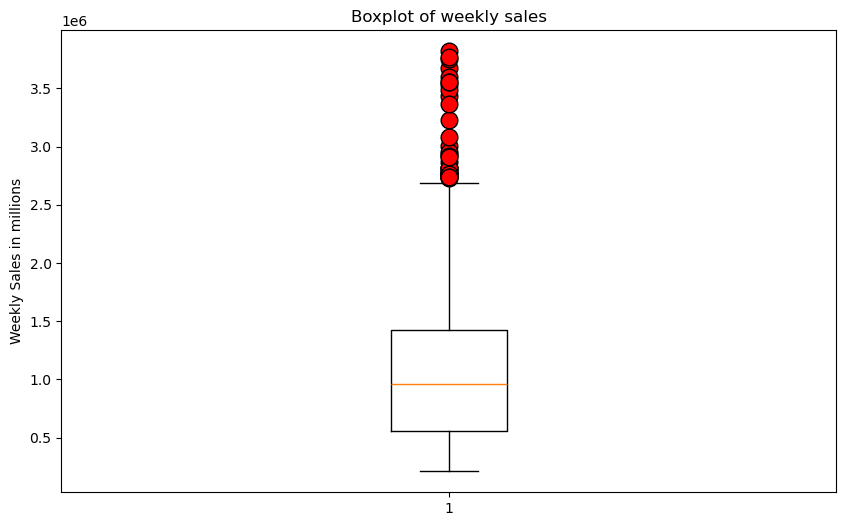

In [235]:
# Check the weekly sales represented in a boxplot
weekly_sales = walmart_data['Weekly_Sales']

plt.figure(figsize=(10,6))
plt.boxplot(weekly_sales, flierprops = dict(markerfacecolor = 'r', marker = 'o', markersize = 12))
plt.title('Boxplot of weekly sales')
plt.ylabel('Weekly Sales in millions')
plt.show()

In [237]:
# Define quantiles and interquantiles range

q1 = weekly_sales.quantile(0.25)
q3 = weekly_sales.quantile(0.75)
iqr = q3 - q1

# Identify lower and upper bound and outliers

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = walmart_data [(weekly_sales < lower_bound) | (weekly_sales > upper_bound)]

# Print outliers
outliers

,Store ID,Date,Weekly_Sales,Holiday_Flag,Avg Temperature (℉),Fuel_Price,Consumer Price Index,Unemployment Rate,Sales_Category,Month
189,2,24-12-2010,3436007.68,None Holiday,49.97,2.886,211.064660,8.163,High,12
241,2,23-12-2011,3224369.80,None Holiday,46.66,3.112,218.999550,7.441,High,12
471,4,26-11-2010,2789469.45,Holiday,48.08,2.752,126.669267,7.127,High,11
474,4,17-12-2010,2740057.14,None Holiday,46.57,2.884,126.879484,7.127,High,12
475,4,24-12-2010,3526713.39,None Holiday,43.21,2.887,126.983581,7.127,High,12
523,4,25-11-2011,3004702.33,Holiday,47.96,3.225,129.836400,5.143,High,11
526,4,16-12-2011,2771397.17,None Holiday,36.44,3.149,129.898065,5.143,High,12
527,4,23-12-2011,3676388.98,None Holiday,35.92,3.103,129.984548,5.143,High,12
761,6,24-12-2010,2727575.18,None Holiday,55.07,2.886,212.916508,7.007,High,12
1329,10,26-11-2010,2939946.38,Holiday,55.33,3.162,126.669267,9.003,High,11


In [239]:
# Print outliers summary
outlier_summary = {
    'Lower Bound': lower_bound,
    'Upper Bound': upper_bound,
    'Number of Outliers': len(outliers)
}
outlier_summary

{'Lower Bound': -746862.7275,
 'Upper Bound': 2720371.4924999997,
 'Number of Outliers': 34}